In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)
from hvass_utils import cifar10


images_train, cls_train, labels_train = cifar10.load_training_data()
images_test, cls_test, labels_test = cifar10.load_test_data()


ModuleNotFoundError: No module named 'CIFAR10'

In [ ]:

from hvass_utils.images_utils import plot_images,plot_conv_weights,plot_conv_output,plot_conv_output,plot_example_errors,plot_image



In [68]:
cls_train_true = labels_train.argmax(axis=1)
cls_test_true = labels_test.argmax(axis=1)

In [69]:
# load model 
data_path = os.getcwd() + '/CNN_model_data'
from keras.models import load_model
model = load_model(data_path + '/saved_model_checkpoint')
# moar training  

In [70]:
# make new predictions
y_pred = model.predict(images_test)
cls_test_pred = y_pred.argmax(axis=1)
cls_test_pred

array([0, 8, 0, ..., 0, 0, 0])

In [71]:
images_test.shape

(10000, 32, 32, 3)

In [1]:
from cnn_example import class_names

plot_images(images=images_test[0:9],
            class_names= class_names,
            cls_true=cls_test_true[0:9],
            cls_pred=cls_test_pred[0:9])

ModuleNotFoundError: No module named 'cnn_example'

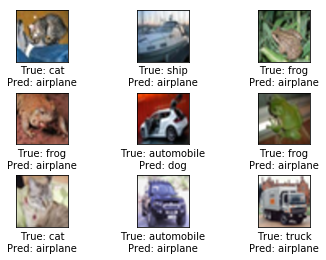

In [73]:
# plot errors 
plot_example_errors(images_test,class_names,cls_test_pred,cls_test_true)

In [74]:
# plot convolutional layers output 
layer_conv1 = model.layers[1]
layer_conv2 = model.layers[3]

In [75]:
# get weights 
weights_conv1 = layer_conv1.get_weights()[0]
weights_conv2 = layer_conv2.get_weights()[0]

In [76]:
%matplotlib inline
weights_conv2.shape

(3, 3, 32, 32)

In [77]:
# 3 x 3 pixels 32 channels input and output 

In [78]:
weights_conv1.shape

(3, 3, 3, 32)

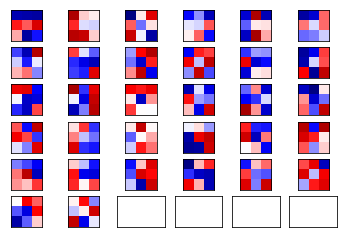

In [79]:
plot_conv_weights(weights=weights_conv1, input_channel=1)

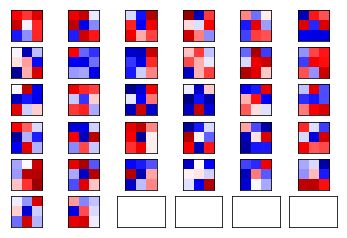

In [80]:
plot_conv_weights(weights=weights_conv2, input_channel=2)

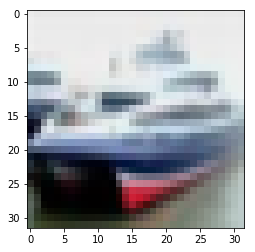

In [81]:
plot_image(images_test[1], (32,32,3))

In [82]:
from tensorflow.python.keras import backend as K
layer_input = model.layers[0]



In [83]:
from keras import Model
output_conv2 = Model(inputs=layer_input.input,  
                     outputs=layer_conv2.output)

In [102]:
import numpy as np
layer_output2 = output_conv2.predict(np.array([images_test[1]]))
layer_output2.shape


(1, 30, 30, 32)

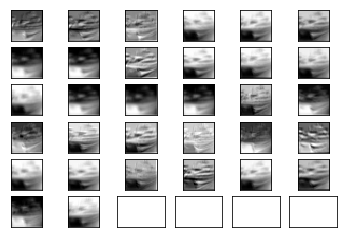

In [103]:
%matplotlib inline
plot_conv_output(values=layer_output2)

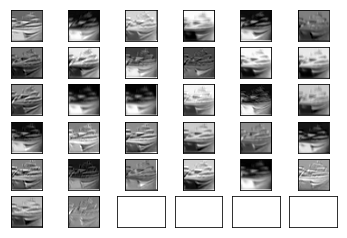

In [104]:
output_conv1 = Model(inputs=layer_input.input, 
                     outputs=layer_conv1.output)
layer_output1 = output_conv1.predict(np.array([images_test[1]]))
layer_output1.shape
plot_conv_output(values=layer_output1)

In [ ]:
# method 2 NOT WORKING 
from tensorflow.python.keras import backend as K
import tensorflow as tf

# NB required otherwise will trigger an error because of unitialized variables.
# probably a  Keras problem.
# this re initialize variables but are random now so the weights are now random 

K.get_session().run(tf.global_variables_initializer())

output_conv1 = K.function(inputs=[layer_input.input], 
                          outputs=[layer_conv1.output])


layer_output1 = output_conv1([[images_test[1]]])[0]
layer_output1.shape



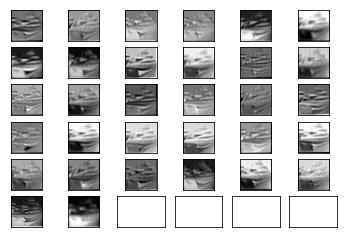

In [120]:
plot_conv_output(values=layer_output1)